
## HOG Features
1. Write a Python script to compute the HOG features of a given image using a library such as
OpenCV or scikit-image.
2. Apply your implementation to at least three different images, including both simple and
complex scenes.
3. Visualize the original image, the gradient image, and the HOG feature image.
4. Compare the HOG features extracted from different images. Discuss the impact of varying
parameters like cell size, block size, and the number of bins on the resulting HOG
descriptors.

In [2]:
import skimage as ski
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters

In [9]:
def hog_script(filename, figsize, orientations, ppc, cpb):
    # Load the image
    image = ski.io.imread('../datasets/images/' + filename)
    if len(image.shape) == 3 and image.shape[2] == 3:
        print('Converting to grayscale')
        image = ski.color.rgb2gray(image)
    
    # Ensure the image has only 2 dimensions (grayscale image)
    if len(image.shape) == 3:
        image = image[:, :, 0]  # In case there is an extra channel axis
    
    image = ski.transform.resize(image, (64, 128))  # Resize the image to a fixed size

    # HOG features
    _, hog_image = ski.feature.hog(image, 
                                          orientations=orientations, #initially 9
                                          pixels_per_cell=(ppc, ppc), #initially 8
                                          cells_per_block=(cpb, cpb), #initially 2
                                          visualize=True) 

    # Plot the image
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1) 
    plt.imshow(image, cmap='gray')
    plt.title('Input image')

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG features')
    plt.show()

Converting to grayscale


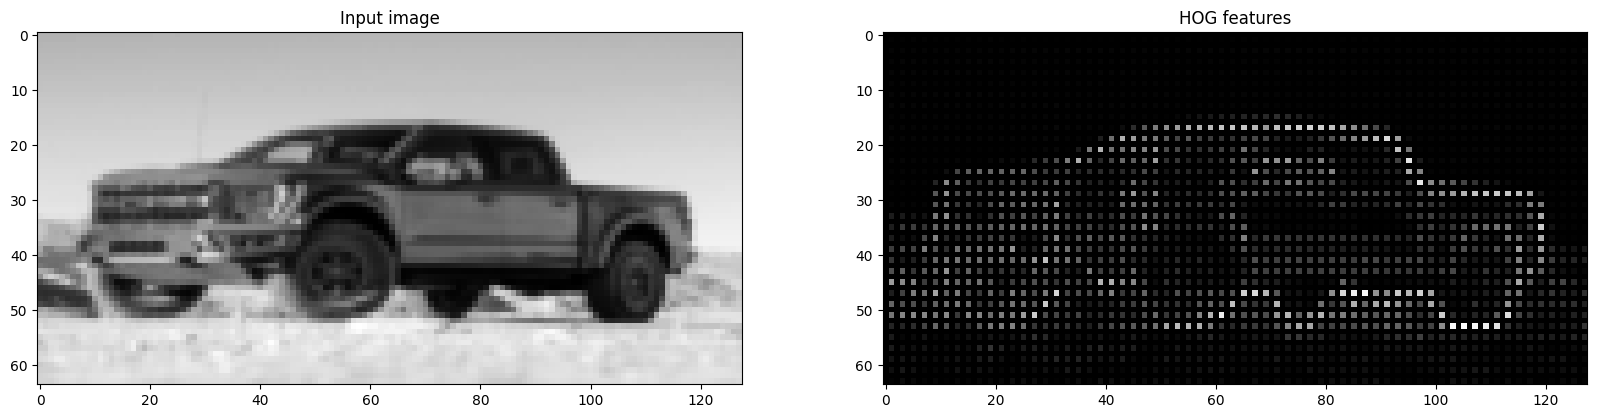

Converting to grayscale


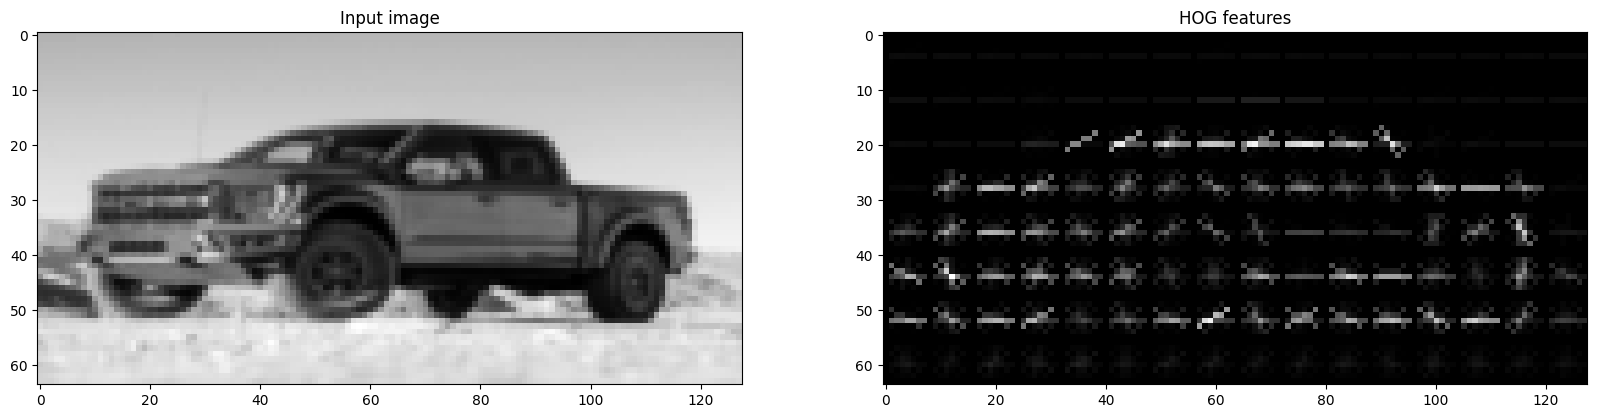

Converting to grayscale


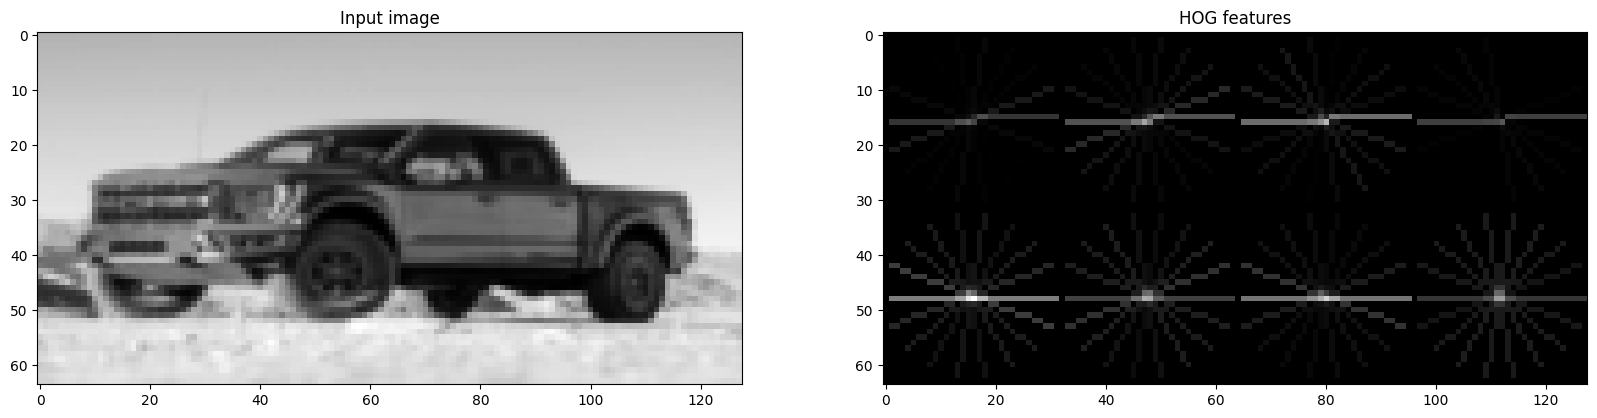

Converting to grayscale


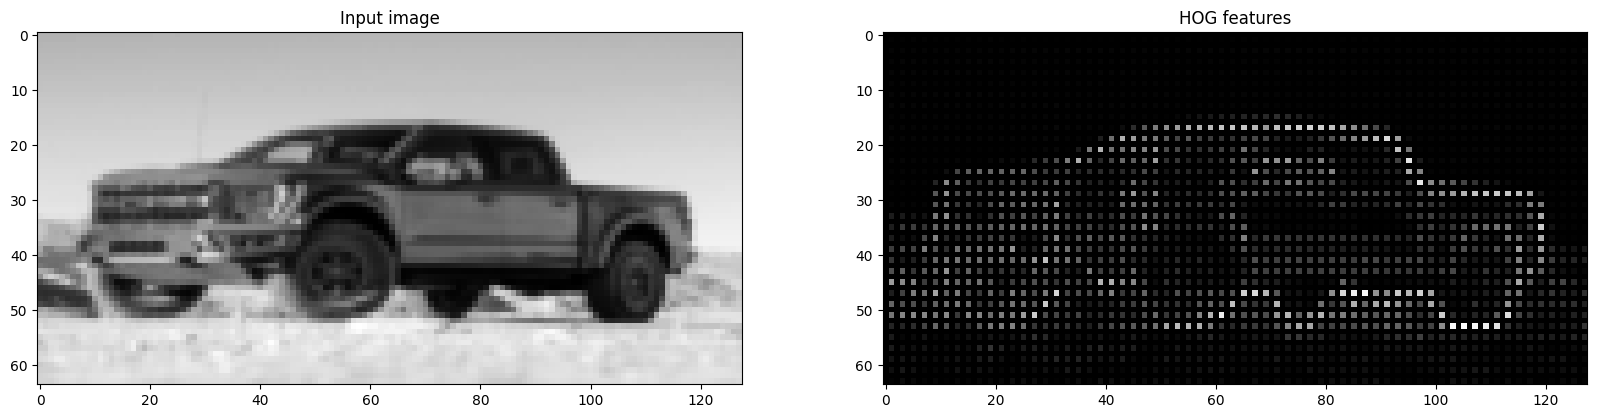

Converting to grayscale


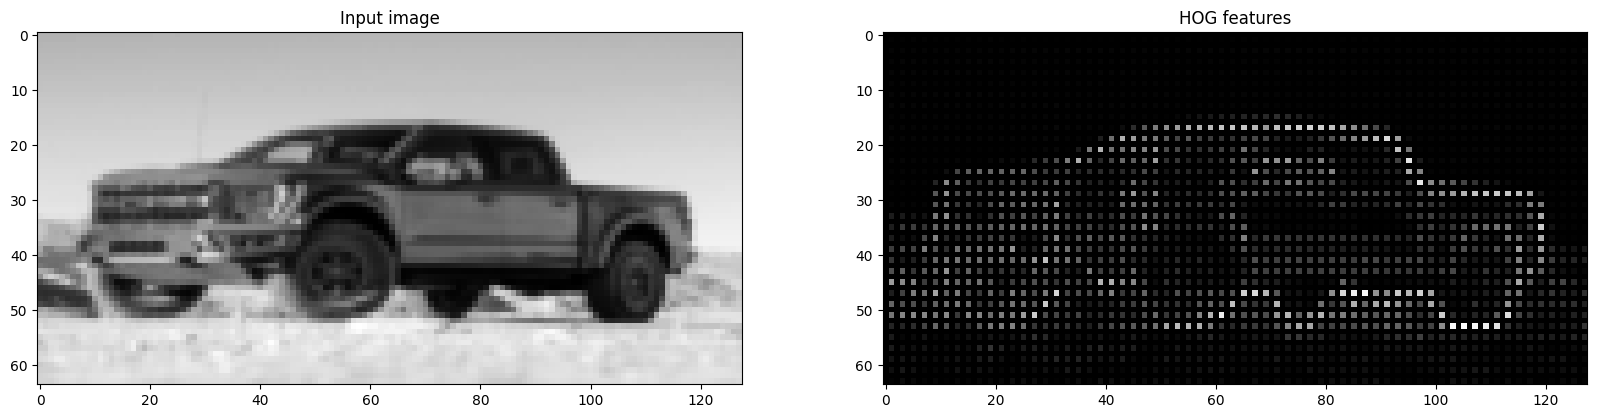

In [11]:
hog_script('ford-f150.jpeg', (20, 10), 9, 2, 2)
hog_script('ford-f150.jpeg', (20, 10), 9, 8, 2)
hog_script('ford-f150.jpeg', (20, 10), 9, 32, 2)

hog_script('ford-f150.jpeg', (20, 10), 9, 2, 1)
hog_script('ford-f150.jpeg', (20, 10), 9, 2, 16)

# hog_script('above.jpeg', (20, 10), 9, 2, 2)
# hog_script('above.jpeg', (20, 10), 9, 8, 2)
# hog_script('above.jpeg', (20, 10), 9, 32, 2)

Converting to grayscale


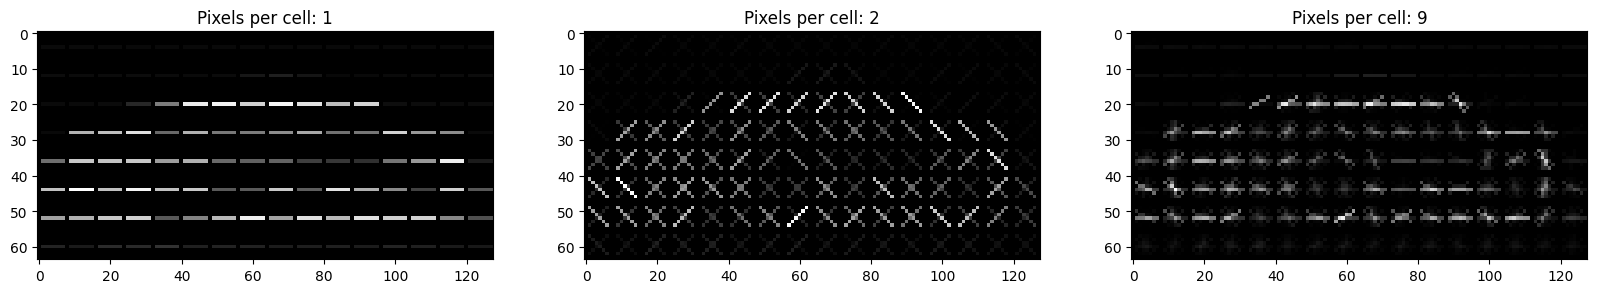

In [10]:
def compare(filename, hog1, hog2, hog3):
    image = ski.io.imread('../datasets/images/' + filename)
    if len(image.shape) == 3 and image.shape[2] == 3:
        print('Converting to grayscale')
        image = ski.color.rgb2gray(image)
    
    # Ensure the image has only 2 dimensions (grayscale image)
    if len(image.shape) == 3:
        image = image[:, :, 0]  # In case there is an extra channel axis
    
    image = ski.transform.resize(image, (64, 128))  # Resize the image to a fixed size

    # HOG features
    _, hog_image1 = ski.feature.hog(image, 
                                          orientations=hog1, #initially 9
                                          pixels_per_cell=(8, 8), #initially 8
                                          cells_per_block=(2, 2), #initially 2
                                          visualize=True) 

    # Plot the image
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1) 
    plt.imshow(hog_image1, cmap='gray')
    plt.title('Pixels per cell: ' + str(hog1)) 

    _, hog_image2 = ski.feature.hog(image,
                                    orientations=hog2,
                                    pixels_per_cell=(8, 8),
                                    cells_per_block=(2, 2),
                                    visualize=True)
    plt.subplot(1, 3, 2) 
    plt.imshow(hog_image2, cmap='gray')
    plt.title('Pixels per cell: ' + str(hog2)) 

    _, hog_image3 = ski.feature.hog(image,
                                    orientations=hog3,
                                    pixels_per_cell=(8, 8),
                                    cells_per_block=(2, 2),
                                    visualize=True)
    
    plt.subplot(1, 3, 3)
    plt.imshow(hog_image3, cmap='gray')
    plt.title('Pixels per cell: ' + str(hog3))
    plt.show()

compare('ford-f150.jpeg', 1, 2, 9)
    

Converting to grayscale


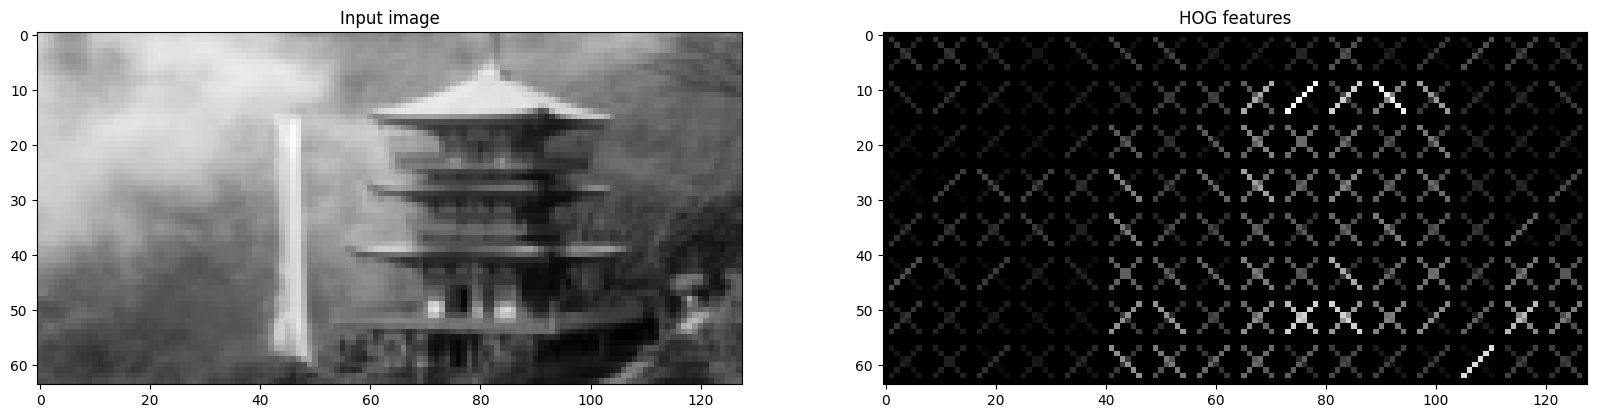

Converting to grayscale


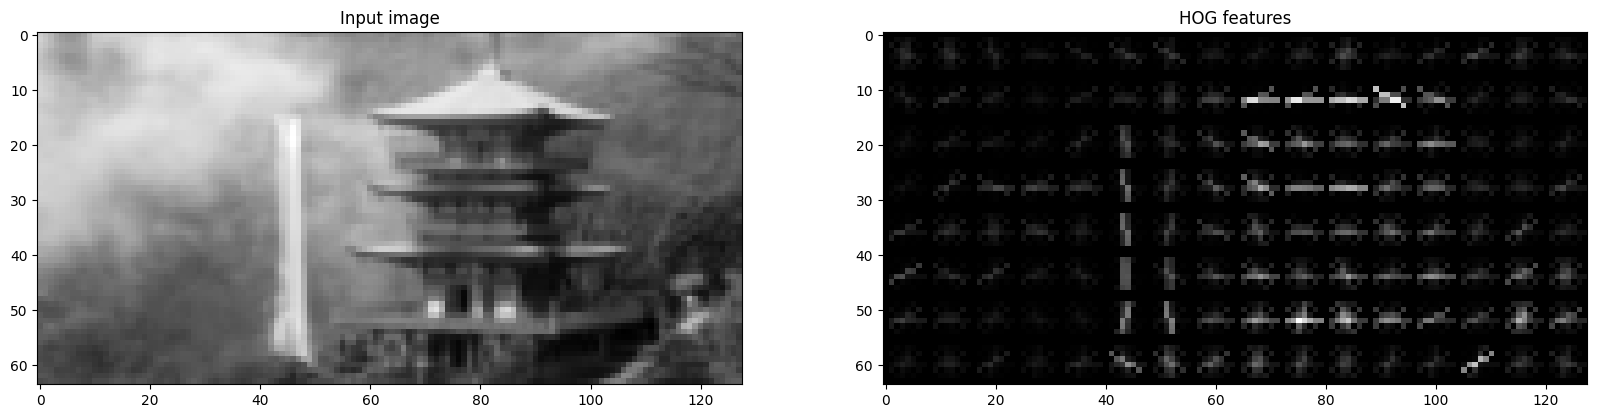

Converting to grayscale


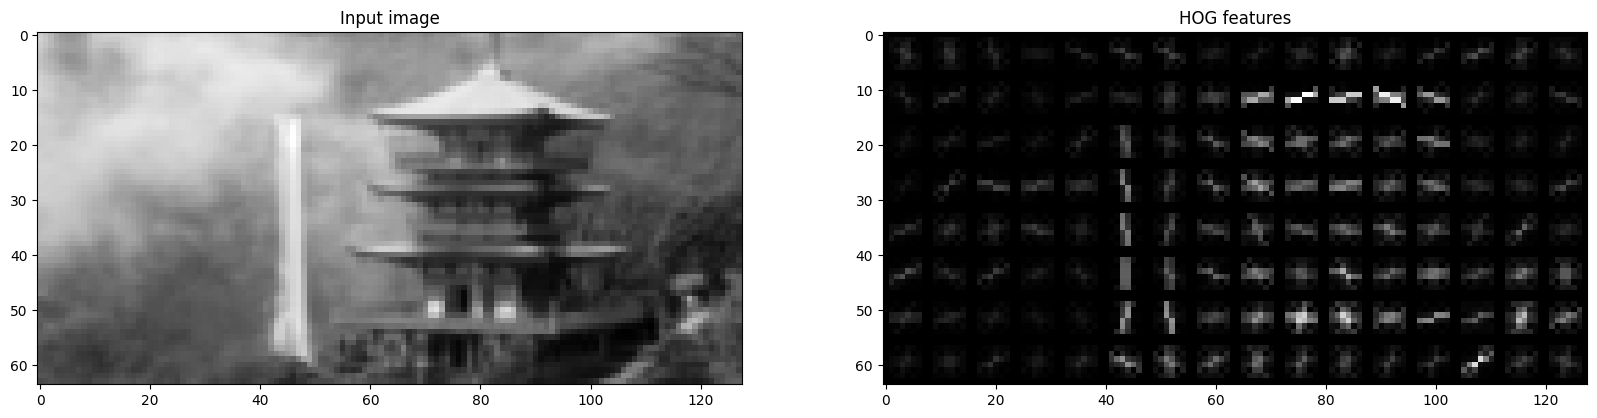

In [19]:
hog_script('japan.jpeg', (20, 10), 2, 8, 2)
hog_script('japan.jpeg', (20, 10), 9, 8, 2)
hog_script('japan.jpeg', (20, 10), 360, 8, 2)

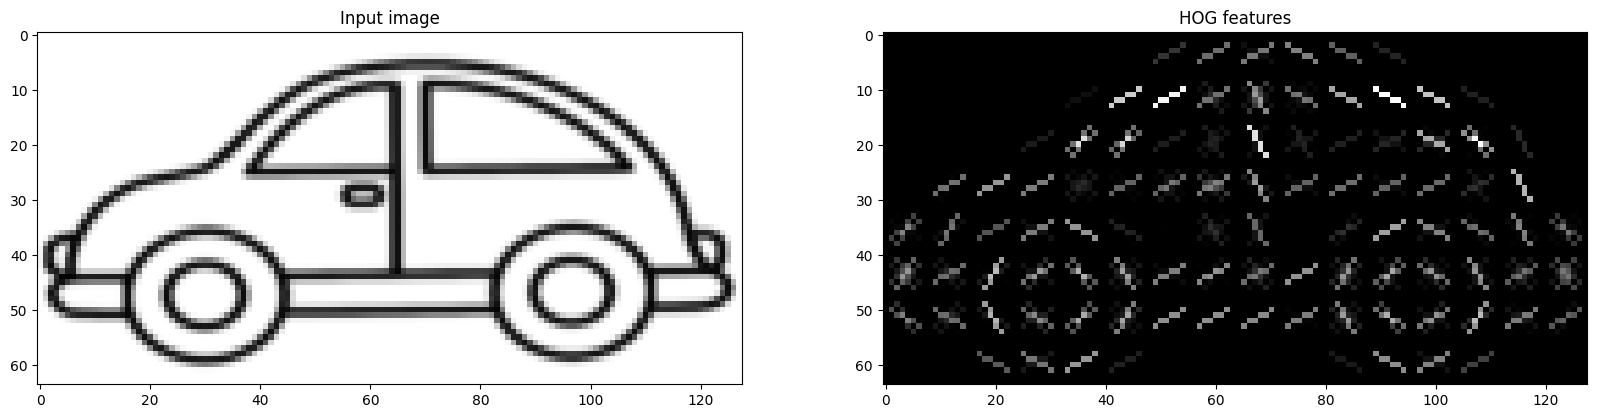

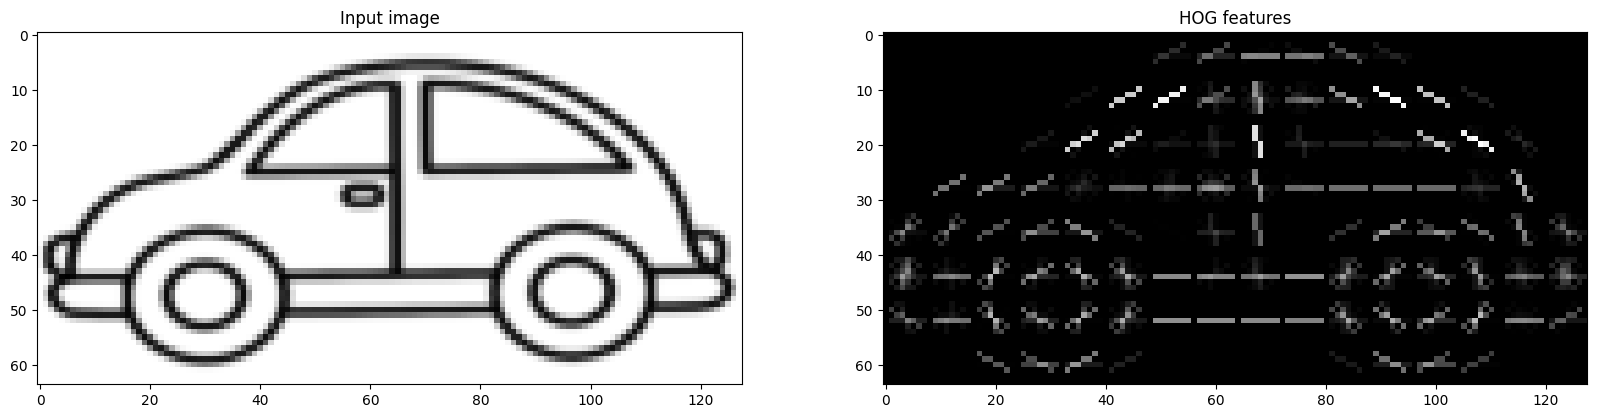

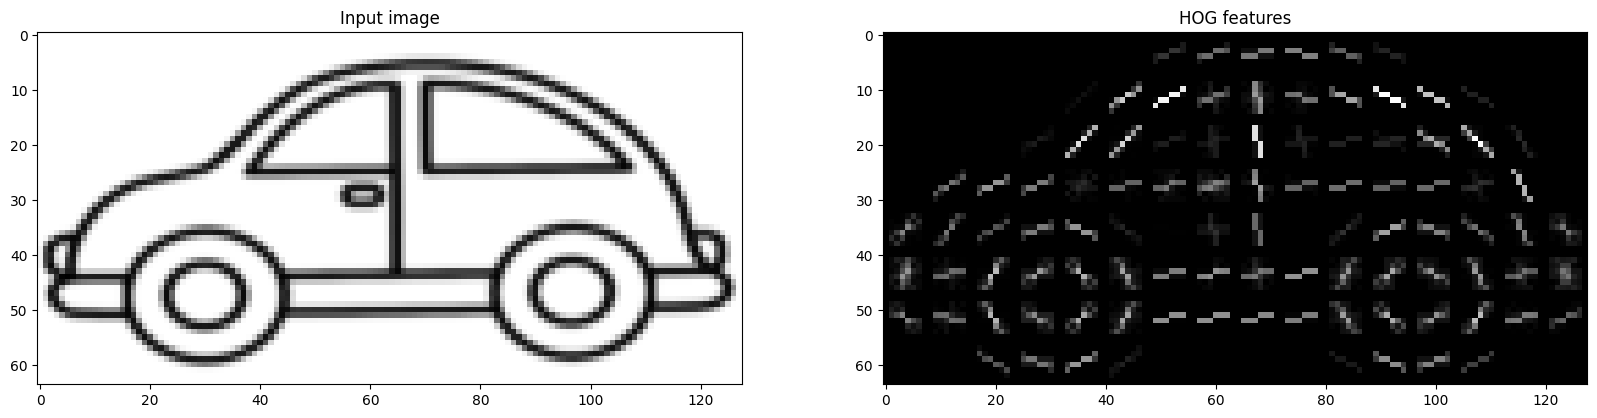

In [20]:
hog_script('car.jpeg', (20, 10), 4, 8, 2)
hog_script('car.jpeg', (20, 10),9, 8, 2)
hog_script('car.jpeg', (20, 10), 30, 8, 2)

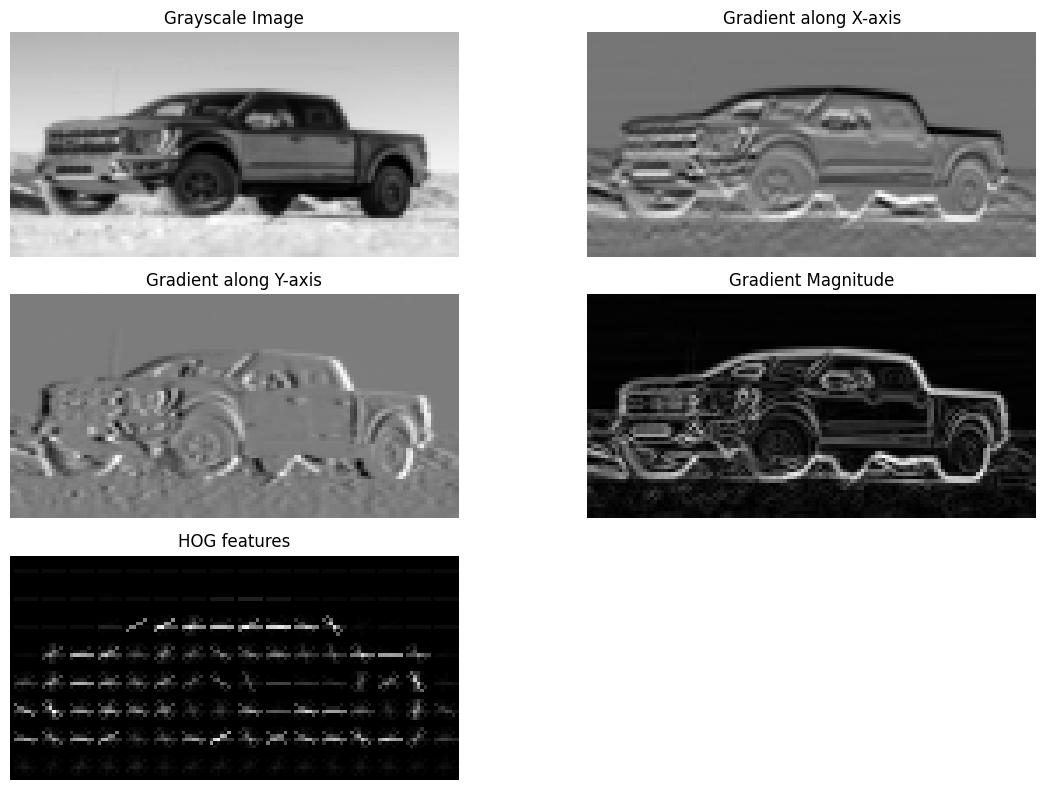

In [21]:
def visualize_gradients(filename):
    # Load the image
    image = ski.io.imread('../datasets/images/' + filename)
    image = ski.transform.resize(image, (64, 128))  # Resize the image to a fixed size
    
    # Convert to grayscale
    if len(image.shape) == 3:
        image = color.rgb2gray(image)
    
    # Compute gradients along x and y axes using numpy's gradient
    grad_x, grad_y = np.gradient(image)
    
    # Compute gradient magnitude
    grad_magnitude = np.sqrt(grad_x**2 + grad_y**2)

    # Plot the gradients
    plt.figure(figsize=(12, 8))
    
    # Original grayscale image
    plt.subplot(3, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    # Gradient along the X-axis
    plt.subplot(3, 2, 2)
    plt.imshow(grad_x, cmap='gray')
    plt.title('Gradient along X-axis')
    plt.axis('off')

    # Gradient along the Y-axis
    plt.subplot(3, 2, 3)
    plt.imshow(grad_y, cmap='gray')
    plt.title('Gradient along Y-axis')
    plt.axis('off')

    # Gradient magnitude (edge intensity)
    plt.subplot(3, 2, 4)
    plt.imshow(grad_magnitude, cmap='gray')
    plt.title('Gradient Magnitude')
    plt.axis('off')

        # HOG features
    _, hog_image = ski.feature.hog(image, 
                                          orientations=9, 
                                          pixels_per_cell=(8, 8),
                                          cells_per_block=(2, 2), 
                                          visualize=True) 

    # Plot the image
    plt.subplot(3, 2, 5)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG features')
    plt.axis('off')

    # Show the plots
    plt.tight_layout()
    plt.show()

# Example usage
visualize_gradients('ford-f150.jpeg')

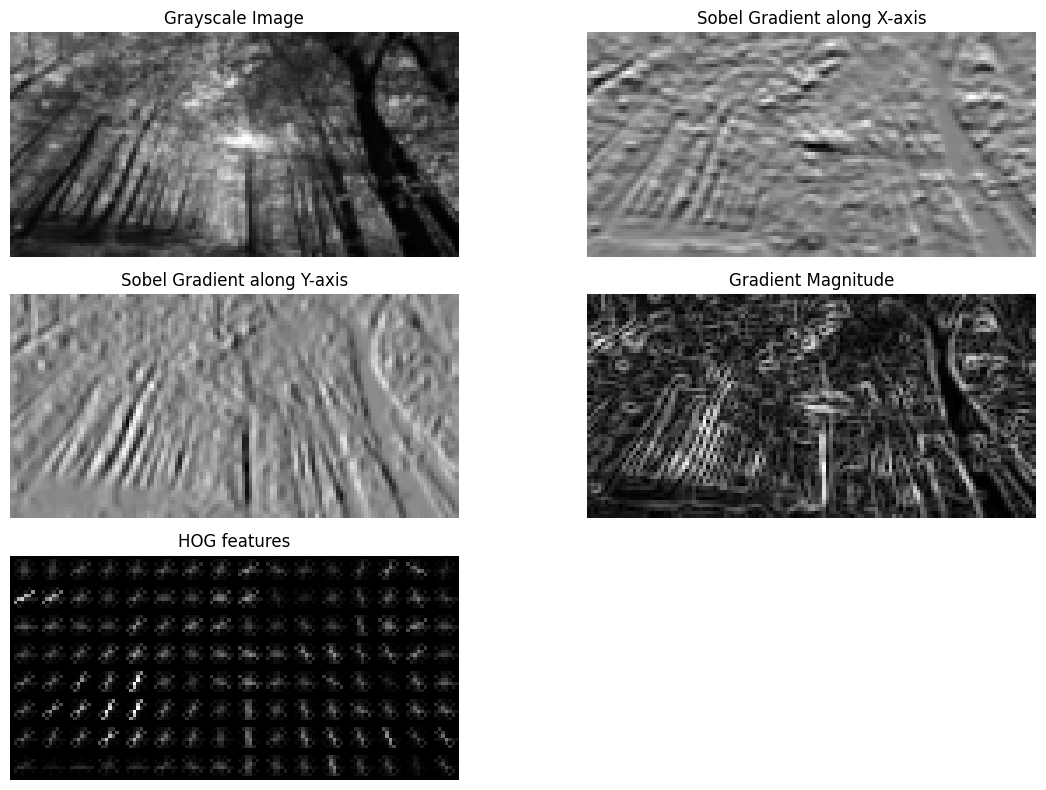

In [2]:
# Visualizing gradients with Sobel filters

from skimage import filters

def visualize_gradients_sobel(filename):
    # Load the image
    image = ski.io.imread('../datasets/images/' + filename)
    image = ski.transform.resize(image, (64, 128))  # Resize the image to a fixed size
    
    # Convert to grayscale
    if len(image.shape) == 3:
        image = color.rgb2gray(image)
    
    # Compute Sobel gradients along x and y axes
    sobel_x = filters.sobel_h(image)  # Horizontal Sobel (x direction)
    sobel_y = filters.sobel_v(image)  # Vertical Sobel (y direction)
    
    # Compute gradient magnitude
    grad_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Plot the gradients
    plt.figure(figsize=(12, 8))
    
    # Original grayscale image
    plt.subplot(3, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    # Sobel Gradient along the X-axis
    plt.subplot(3, 2, 2)
    plt.imshow(sobel_x, cmap='gray')
    plt.title('Sobel Gradient along X-axis')
    plt.axis('off')

    # Sobel Gradient along the Y-axis
    plt.subplot(3, 2, 3)
    plt.imshow(sobel_y, cmap='gray')
    plt.title('Sobel Gradient along Y-axis')
    plt.axis('off')

    # Gradient magnitude (edge intensity)
    plt.subplot(3, 2, 4)
    plt.imshow(grad_magnitude, cmap='gray')
    plt.title('Gradient Magnitude')
    plt.axis('off')

        # HOG features
    _, hog_image = ski.feature.hog(image, 
                                          orientations=9, 
                                          pixels_per_cell=(8, 8),
                                          cells_per_block=(2, 2), 
                                          visualize=True) 

    # Plot the image
    plt.subplot(3, 2, 5)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG features')
    plt.axis('off')

    # Show the plots
    plt.tight_layout()
    plt.show()

# Example usage
visualize_gradients_sobel('forest.jpeg')

In [4]:
# Visualizing gradients with Sobel filters

def visualize_gradients_sobel_3(filename):
    # Load the image
    image = ski.io.imread('../datasets/images/' + filename)
    image = ski.transform.resize(image, (64, 128))  # Resize the image to a fixed size

    if len(image.shape) == 3 and image.shape[2] == 3:
        image = ski.color.rgb2gray(image)
    
    # Ensure the image has only 2 dimensions (grayscale image)
    if len(image.shape) == 3:
        image = image[:, :, 0]  # In case there is an extra channel axis
    
    
    # Compute Sobel gradients along x and y axes
    sobel_x = filters.sobel_h(image)  # Horizontal Sobel (x direction)
    sobel_y = filters.sobel_v(image)  # Vertical Sobel (y direction)
    
    # Compute gradient magnitude
    grad_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Plot the gradients
    plt.figure(figsize=(12, 8))
    
    # Original grayscale image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')


    # Gradient magnitude (edge intensity)
    plt.subplot(1, 3, 2)
    plt.imshow(grad_magnitude, cmap='gray')
    plt.title('Gradient Image')
    plt.axis('off')

        # HOG features
    _, hog_image = ski.feature.hog(image, 
                                          orientations=9, 
                                          pixels_per_cell=(8, 8),
                                          cells_per_block=(2, 2), 
                                          visualize=True) 

    # Plot the image
    plt.subplot(1, 3, 3)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG features')
    plt.axis('off')

    # Show the plots
    plt.tight_layout()
    plt.show()

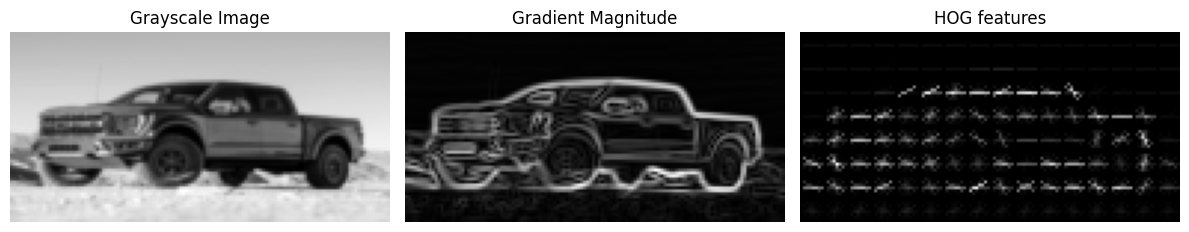

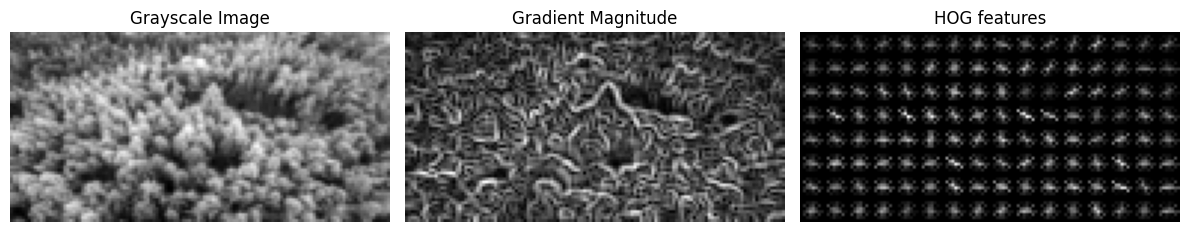

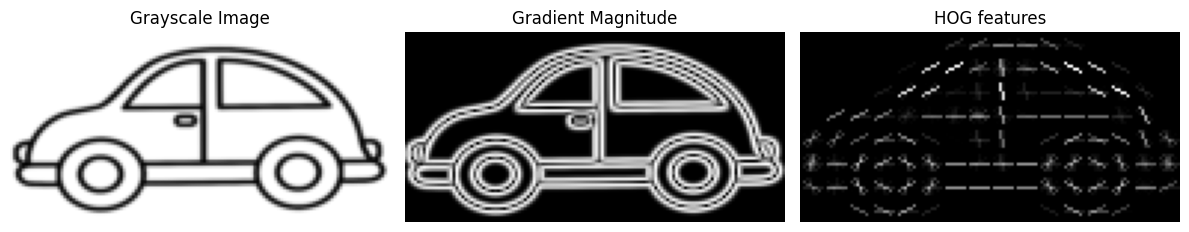

In [7]:
visualize_gradients_sobel_3('ford-f150.jpeg')
# visualize_gradients_sobel_3('japan.jpeg')
# visualize_gradients_sobel_3('forest.jpeg')
visualize_gradients_sobel_3('above.jpeg')
visualize_gradients_sobel_3('car.jpeg')